## Plot Model Loss during training

## DataSet 資料集
https://www.cs.toronto.edu/~kriz/cifar.html

## Reference
https://medium.com/geekculture/how-to-plot-model-loss-while-training-in-tensorflow-9fa1a1875a5

In [17]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from matplotlib import  pyplot as plt
import seaborn as sns


## 載入資料源

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## 資料前處理 - One hot encoding

原始資料是有序離散值的話 => Label Encoding

原始資料是無序離散值的話 => One Hot Encoding (Dummies)

Ref: https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87



In [19]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()    # fit + transform
y_test=one_hot.transform(y_test).toarray()


## 建立Loss Plot Class

In [20]:
import numpy as np 
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

## 繪製神經網路模型的損失圖

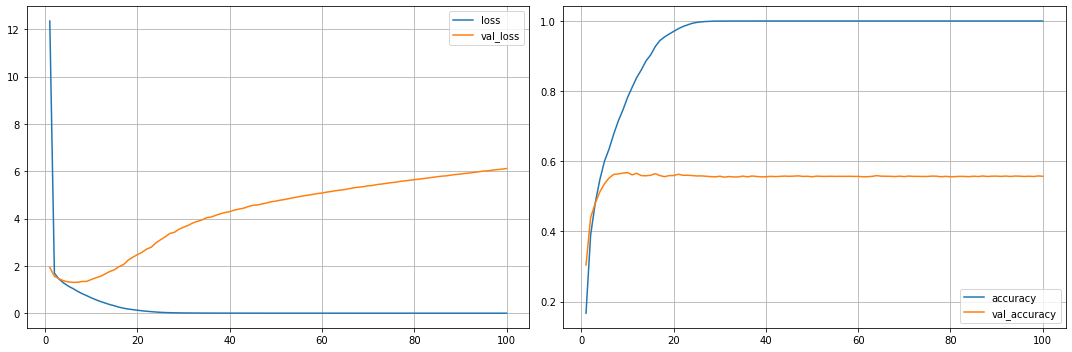

50/50 [==============================] - 53s 1s/step - loss: 1.2096e-04 - accuracy: 1.0000 - val_loss: 6.1160 - val_accuracy: 0.5573


In [21]:
classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(32, kernel_size=(3,3), input_shape=(32,32,3),activation='relu'))#32,3,3,input_shape=(32,32,3),activation='relu''

#卷積組合
classifier.add(Convolution2D(32, kernel_size=(3,3), input_shape=(32,32,3),activation='relu'))

'''自己決定MaxPooling2D放在哪裡'''
classifier.add(MaxPooling2D(pool_size=(2,2)))

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(100,activation='relu')) #output_dim=100,activation=relu

#輸出
classifier.add(Dense(10,activation='softmax'))

# plot loss
callbacks_list = [PlotLearning()]

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,
                y_train,
                batch_size=1000,
                epochs=100,
                validation_data=(x_test, y_test),
                callbacks=callbacks_list    # add callback list  to callback
                )